In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


Load and Explore the Dataset

In [2]:
import os

reqd_file_path = os.path.join(os.getcwd(), 'datasets','customer_churn_dataset.csv')

print(reqd_file_path)

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\customer_churn_dataset.csv


In [3]:
print('Checking is path exist:', os.path.exists(reqd_file_path))

Checking is path exist: True


In [4]:
import pandas as pd

df = pd.read_csv(reqd_file_path)

print(df.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


In [6]:
print(df.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


 Data Preprocessing

In [7]:
df = df.dropna()

In [8]:
df.drop(columns=['CustomerID'], inplace=True)

Encode Categorical Variables

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])
    

In [10]:
print(df.head())

   Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   22       0      25               14              4             27   
1   41       0      28               28              7             13   
2   47       1      27               10              2             29   
3   35       1       9               12              5             17   
4   53       0      58               24              9              2   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  
0                  0                1          598                 9      1  
1                  2                1          584                20      0  
2                  1                0          757                21      0  
3                  1                2          232                18      0  
4                  2                0          533                18      0  


Feature Selection

In [11]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [12]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18
...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14
64370,37,1,6,1,5,22,2,0,923,9
64371,25,1,39,14,8,30,1,1,327,20
64372,50,0,18,19,7,22,2,1,540,13


In [13]:
y

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

Split the Data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
X_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
13468,56,0,42,11,0,10,1,2,793,15
20118,54,1,60,5,3,9,2,2,610,24
48411,31,1,12,2,9,7,0,0,222,30
42125,33,0,22,17,5,25,1,1,648,20
55119,39,0,28,30,2,25,1,1,983,22
...,...,...,...,...,...,...,...,...,...,...
62570,50,1,38,11,5,28,1,2,568,5
38158,53,1,44,30,3,3,1,1,447,21
860,33,0,47,9,2,26,2,2,454,6
15795,24,1,57,19,10,9,1,0,948,27


In [16]:
X_test

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
15476,55,1,20,24,4,6,2,1,635,25
34666,28,1,27,30,4,5,1,2,631,10
50474,65,0,60,17,7,16,1,2,314,1
7984,53,1,47,16,8,7,1,0,527,13
20227,32,1,56,5,7,15,1,0,236,25
...,...,...,...,...,...,...,...,...,...,...
15815,42,1,56,17,5,14,1,0,510,19
23037,62,0,1,23,2,19,2,2,958,3
55566,52,0,50,7,5,28,1,2,871,6
22749,20,0,56,25,4,20,2,0,787,23


In [17]:
y_train

13468    0
20118    0
48411    1
42125    1
55119    1
        ..
62570    1
38158    0
860      1
15795    0
56422    1
Name: Churn, Length: 51499, dtype: int64

In [18]:
y_test

15476    0
34666    0
50474    1
7984     0
20227    0
        ..
15815    0
23037    0
55566    1
22749    0
31651    0
Name: Churn, Length: 12875, dtype: int64

Build and Train the Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

Train the Model:

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

 Evaluate the Model

In [21]:
y_pred = clf.predict(X_test)

In [22]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

Calculate Performance Metrics:

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

#Display the results now
print(f'Accuracy: {accuracy*100:.2f} %')
print(f'Precision: {precision*100:.2f} %')
print(f'Recall: {recall*100:0.2f} %')
print(f'\n\nConfusion matrix:')
print(cm)

Accuracy: 99.89 %
Precision: 99.88 %
Recall: 99.88 %


Confusion matrix:
[[6786    7]
 [   7 6075]]


Visualize the Decision Tree

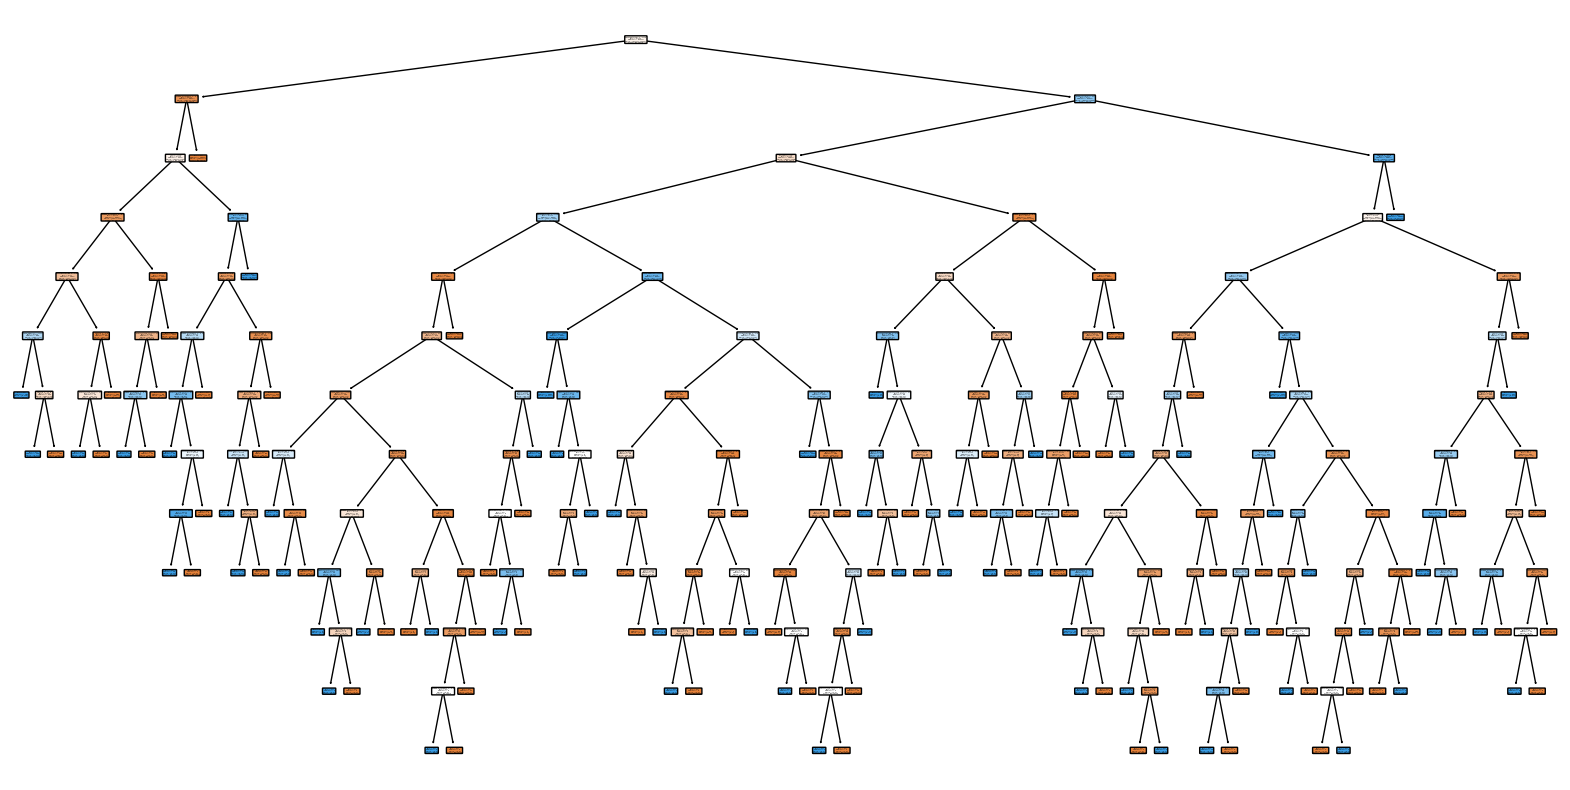

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'], rounded=True)


plt.show()

Interpret Results and Make Recommendations

In [25]:
importances = clf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance':importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

             Feature  Importance
5      Payment Delay    0.422889
4      Support Calls    0.131855
1             Gender    0.101933
2             Tenure    0.098872
3    Usage Frequency    0.092081
7    Contract Length    0.065751
0                Age    0.051831
8        Total Spend    0.031073
6  Subscription Type    0.003373
9   Last Interaction    0.000342


In [ ]:
From this we can find out that the top ones are the main reasons for churn. 

Lets display that.

In [26]:
top_features = feature_importances.head(5)


In [27]:
print('\nThe top 5 reasons for churn are:\n')

for index, row in top_features.iterrows():
    print(f"{row['Feature']:<20} \t   (Importance: {row['Importance']*100:>10.2f}%)")


The top 5 reasons for churn are:

Payment Delay        	   (Importance:      42.29%)
Support Calls        	   (Importance:      13.19%)
Gender               	   (Importance:      10.19%)
Tenure               	   (Importance:       9.89%)
Usage Frequency      	   (Importance:       9.21%)


Project successfully completed.